# Predict Sales(Statistical modeling) using TV, Radio and Newspaper advertisement expenditure

 Linear regression and use of stats models and sklearn to build regression model and evaluate it

Objectives
1. Analyzing Advertisement dataset.
2. Building a simple linear regression model & multiple linear regression model.
3. Understanding OLS methods to estimate model parameters.
4. How to use statsmodel API in python?
5. Interpreting the coefficients of the model.
6. How to find if the parameters estimated are significant?
7. Making predictions using the model.
8. Finding model residuals and analyzing it.
9. Evaluating model efficiency using RMSE and R-Square values.
10. Understanding gradient descent approach to find model parameters.

In [1]:
import pandas as pd
import numpy as np

Read the data

In [2]:
data = pd.read_csv( "Advertising.csv" )

In [3]:
data.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Remove the first column

In [5]:
data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [6]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Exploring data

### Distribution of variables 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

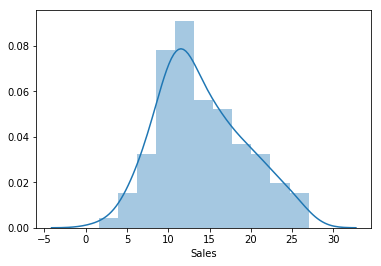

In [8]:
sns.distplot( data.Sales )

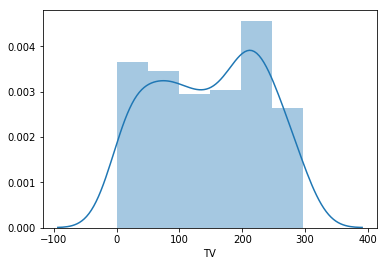

In [9]:
sns.distplot( data.TV )

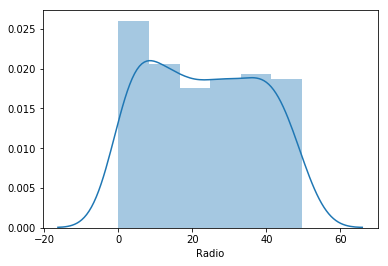

In [10]:
sns.distplot( data.Radio )

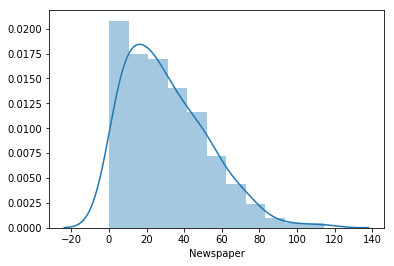

In [11]:
sns.distplot( data.Newspaper )

#### Note: Sales seems to be normal distribution. Spending on newspaper advertisement seems to be righ skewed. Most of the spends on newspaper is fairly low where are spend on radio and tv seems be uniform distribution. Spends on tv are comparatively higher than spends on radio and newspaper.

### Is there a relationship between sales and spend various advertising channels? 

Sales Vs. TV advertisement spends

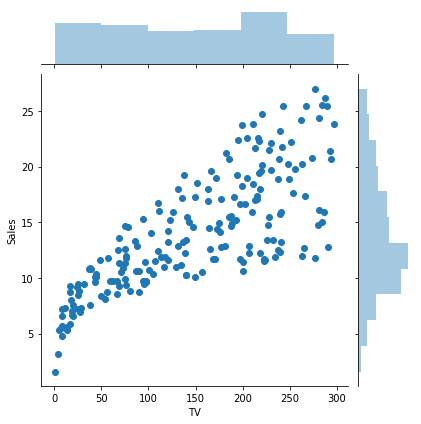

In [12]:
sns.jointplot( data.TV, data.Sales )

Sales Vs. Radio advertisement spends

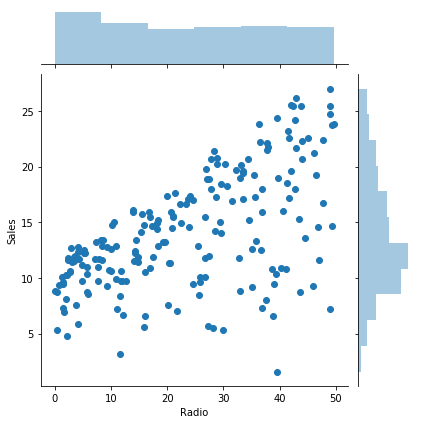

In [13]:
sns.jointplot( data.Radio, data.Sales )

Sales Vs. Newspaper advertisement spends

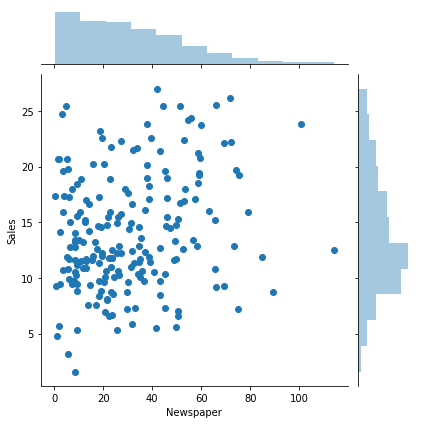

In [14]:
sns.jointplot( data.Newspaper, data.Sales )

#### Note: Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.

### Visualizing pairwise correleation 

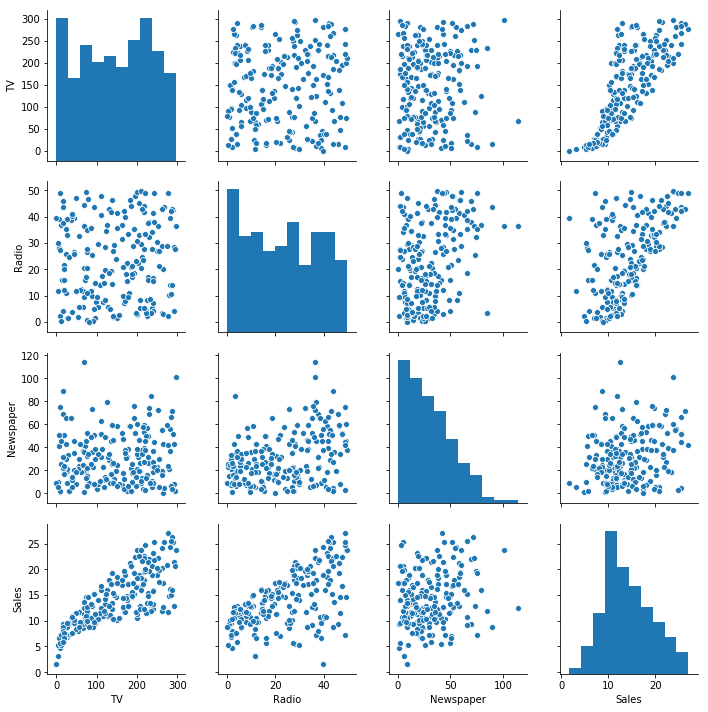

In [15]:
sns.pairplot( data )

### Calculating correlations 

In [16]:
data.TV.corr( data.Sales )

0.7822244248616061

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Note: 
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then betweeb sales and radio i.e. 0.576.

2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

### Visualizing the correlation 

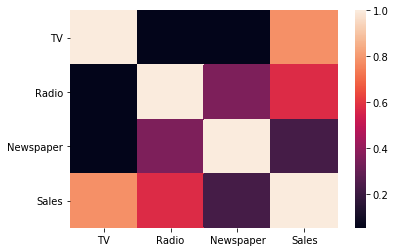

In [18]:
sns.heatmap( data.corr() )

### Building a Simple Linear Regression model

In [19]:
import statsmodels.api as sm

In [20]:
x = sm.add_constant( data.TV )
y = data.Sales

In [21]:
lm = sm.OLS( y, x ).fit()

### Getting model parameters

In [22]:
lm.params

const    7.032594
TV       0.047537
dtype: float64

### Model Summary

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        11:38:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluating Model Accuracy
1. R-squared is a statistical measure of how close the data are to the fitted regression line.
2. R-square signifies percentage of variations in the reponse variable that can be explained by the model.
3. R-squared = Explained variation / Total variation
4. Total variation is variation of response variable around it's mean.
5. R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, while 100% signifies that the model explains all the variability of the response. The closer the r-square to 100%, the better is the model.

In [25]:
lm.rsquared

0.611875050850071

In [26]:
round( lm.rsquared, 2 )

0.61

### Making Predictions

In [27]:
lmpredict = lm.predict( x )

In [28]:
lmpredict[0:4]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
dtype: float64

#### Calculating RMSE

In [29]:
from statsmodels.tools.eval_measures import rmse

In [30]:
rmse( y, lmpredict )

3.2423221486546887

#### Get the residuals and plot them

In [31]:
lm.resid[0:4]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
dtype: float64

Note: One of the assumptions is that the residuals should be normally distributed i.e. it should be random.

The residuals should be plotted against the response variable and it should not show any pattern

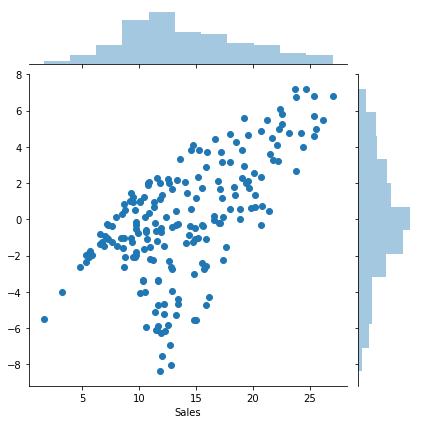

In [32]:
sns.jointplot( data.Sales, lm.resid )

### Multiple Linear Regression Model 

In [33]:
x = sm.add_constant( data[['TV', 'Radio','Newspaper']] )

In [34]:
x.head(2)

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1


In [35]:
lm = sm.OLS( y, x ).fit()

In [36]:
lm.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [37]:
lm.pvalues

const        1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        11:39:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lmpredict = lm.predict( x )

In [40]:
rmse( y, lmpredict )

1.6685701407225697

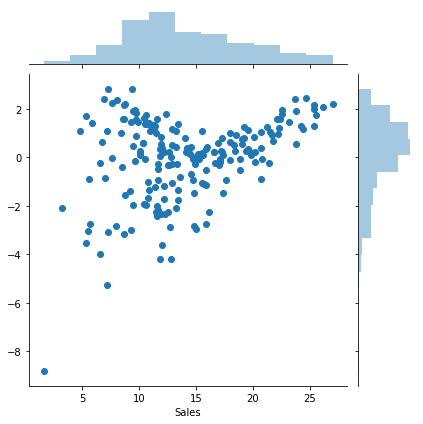

In [41]:
sns.jointplot( data.Sales, lm.resid )

#### Splitting into Train and Test data sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data[["TV", "Radio"]], data.Sales, test_size=0.3)

In [45]:
len( x_train )

140

In [46]:
len( x_test )

60

#### Build the model

In [47]:
x_train = sm.add_constant( x_train )
x_test = sm.add_constant( x_test )

In [48]:
lm = sm.OLS( y_train, x_train ).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     743.1
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.86e-74
Time:                        11:41:59   Log-Likelihood:                -248.98
No. Observations:                 140   AIC:                             504.0
Df Residuals:                     137   BIC:                             512.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3177      0.303     10.957      0.000       2.719       3.916
TV             0.0421      0.001     28.740      0.000       0.039       0.045
Radio          0.1990      0.008     23.745      0.000       0.182       0.216
==============================================================================
Omnibus:                       10.817   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.459
Skew:                          -0.699   Prob(JB):                      0.00325
Kurtosis:                       3.110   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
y_predict = lm.predict( x_test )

In [51]:
rmse( y_predict, y_test )

2.22124376731309

In [52]:
residuals = y_test - y_predict

#### Residual Plots

Scatter plot

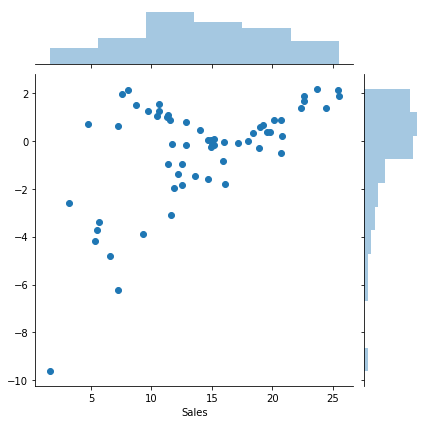

In [53]:
sns.jointplot( y_test, residuals )

#### The residuals are not randomly distributed. The p-value for the correlation is less than 0.05. So, the correlation estimated is statistically significant

In [54]:
import pylab
import scipy.stats as stats

#### Normality test for residuals

In [55]:
from scipy.stats import normaltest

In [56]:
normaltest( residuals )

NormaltestResult(statistic=33.83186590305047, pvalue=4.503017791873102e-08)

Note: As the null hypothesis is the sample is derived from normal distribution and the p-value is less than 0.05, it is concluded that the residuals are not normally distributed

### Check multi-collinearity

1. VIF (Variance inflation factor) is an indicator of how a predictor is correlated with other predictors. This can be done by taking the predictor in question, and regress it against all of the other predictors in our model.

2. And the VIF is calculated from r-squared value of the model as 1/(1-R^2)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
data_mat = data[['TV', "Radio", "Newspaper"]].values

In [71]:
data_mat.shape

(200, 3)

In [72]:
vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]

In [73]:
vif_factors = pd.DataFrame()

In [74]:
vif_factors['column'] = ['TV', "Radio", "Newspaper"]
vif_factors['vif'] = vif

In [75]:
vif_factors

,column,vif
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


Note: As the VIF factors is less than 5, there is no multicolliearity between the variables